Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Kristian Hristov Dobrev"
COLLABORATORS = ""

---

# Python assignment

The python assignment you can do either on your own or with one other student (i.e. max group size is 2 students).

The first cell of your notebook, should contain a table with the names and SNRs and ANRs of the group members, like so

|Name|SNR|ANR|
|----|---|----|
|Kristian Dobrev|2026708|821874|



See [the webpage](https://janboone.github.io/applied-economics/#org065a005) for details of what we expect to see in this assignment.



# Research question (0.5 points)

Formulate the research question: what question do you want to answer in this assignment?

How has the European integration affected the newly admitted countries (in 2004, 2007 and 2013) in the European Union?

# Motivation (0.5 points)

Motivate why this question is interesting.

The growing movements of Euroscepticism in the EU countries, and especially in the countries that I have studied, are making this issue extremely relevant. Its answer could provide a basis for the affirmation of pro-European politicians or it could strengthen the desire of Eurosceptics for their countries to leave the EU.

# Method (0.5 points)

If you do a theory notebook (without external data; but perhaps with data that you simulate yourself), explain the methods that you use for the theory:

* is there an optimization problem underlying the notebook (like a firm maximizing profits)?
* do you calculate an equilibrium?
* what model do you use?

# [optional] Data [0.5 points]

**These 0.5 points are instead of the Method points above**

If you use data for your assignment, the Method part above does not apply. Instead,

* explain where your data come from (give a link or the code to download the data if you use an API like [wbdata](https://wbdata.readthedocs.io/en/stable/));
* explain the data cleaning and data normalization steps that you use;
* make sure that the data is in your github repository as well (or explain why this is not possible) so that we can replicate your analysis;
* what statistical methods do you use with the data.


My data comes form the [Eurostat](https://pypi.org/project/eurostat/) API.
I will use descriptive analysis in order to answer the aforementioned question. For better visibility and clearance of the plots I have divided the countries of my analysis into five groups:
1. ***Poland, the Czech Republic and Hungary*** - group of the Visegrad Four countries. The only country missing here is Slovakia, the reason for which is given below.
2. ***Slovakia and Slovenia*** - placing these two countries into one group would make the analysis more interesting with comparisons between them based on different indicators, as both countries were part of larger countries in the early 1990s of the last century. Slovakia became an independent state after the break-up of Czechoslovakia on 1 January 1993, and Slovenia gained independence from Yugoslavia on 25 June 1991.
3. ***Lithuania, Latvia and Estonia*** - group of the Baltic countries.
4. ***Cyprus and Malta*** - group of the southern countries that joined the EU in 2004.
5. ***Romania, Bulgaria and Croatia*** - group of the countries that joined the EU last.

# Preview of the answers (0.5 points)

Summarize the results that you find and the answer to your research question.

YOUR ANSWER HERE

# Main assumptions (0.5 points)

What are the main assumptions that you need to answer the question? If you do a theory notebook, what are the main assumptions of your model? If you use data, what assumptions are needed by your estimation method.

YOUR ANSWER HERE

# Python code (6.5 points)


Give the python code in code cells and use markdown cells to explain why you code things in this way and what the outcomes are of the code cells.

Note that the explanation of your code is at least as important as the python code itself.

Create as many python and markdown cells as you need to explain things well.


In [2]:
pip install eurostat

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata as wb
import datetime as dt
import eurostat as eu

group_1 = ['POL', 'CZE', 'HUN']
group_2 = ['SVK', 'SVN']
group_3 = ['LTU', 'LVA', 'EST']
group_4 = ['CYP', 'MLT']
group_5 = ['ROU', 'BGR', 'HRV']
eu_15 = ['BEL', 'DNK', 'FRA', 'DEU', 'GRC', 'IRL', 'ITA', 'LUX', 'NLD', 'PRT', 'ESP', 'GBR', 'AUT', 'FIN', 'SWE']
#toc_df = eu.get_toc_df()

In [59]:
#Getting a list of the countries
wb.get_country()

## *GDP per capita*

In [58]:
#Searching for an indicator
wb.search_indicators('gdp per capita')

6.0.GDPpc_constant        	GDP per capita, PPP (constant 2011 international $) 
FB.DPT.INSU.PC.ZS         	Deposit insurance coverage (% of GDP per capita)
NV.AGR.PCAP.KD.ZG         	Real agricultural GDP per capita growth rate (%)
NY.GDP.PCAP.CD            	GDP per capita (current US$)
NY.GDP.PCAP.CN            	GDP per capita (current LCU)
NY.GDP.PCAP.KD            	GDP per capita (constant 2010 US$)
NY.GDP.PCAP.KD.ZG         	GDP per capita growth (annual %)
NY.GDP.PCAP.KN            	GDP per capita (constant LCU)
NY.GDP.PCAP.PP.CD         	GDP per capita, PPP (current international $)
NY.GDP.PCAP.PP.KD         	GDP per capita, PPP (constant 2017 international $)
NY.GDP.PCAP.PP.KD.87      	GDP per capita, PPP (constant 1987 international $)
NY.GDP.PCAP.PP.KD.ZG      	GDP per capita, PPP annual growth (%)
SE.XPD.PRIM.PC.ZS         	Government expenditure per student, primary (% of GDP per capita)
SE.XPD.SECO.PC.ZS         	Government expenditure per student, secondary (% of GDP per c

## *GDP growth*

In [60]:
#Searching for an indicator
wb.search_indicators('gdp growth')

5.51.01.10.gdp      	Per capita GDP growth
6.0.GDP_growth      	GDP growth (annual %)
NV.AGR.TOTL.ZG      	Real agricultural GDP growth rates (%)
NY.GDP.MKTP.KD.ZG   	GDP growth (annual %)
NY.GDP.MKTP.KN.87.ZG	GDP growth (annual %)


## *Inflation rate*

In [61]:
#Searching for an indicator
wb.search_indicators('inflation')

FP.CPI.TOTL.ZG      	Inflation, consumer prices (annual %)
FP.FPI.TOTL.ZG      	Inflation, food prices (annual %)
FP.WPI.TOTL.ZG      	Inflation, wholesale prices (annual %)
NY.GDP.DEFL.87.ZG   	Inflation, GDP deflator (annual %)
NY.GDP.DEFL.KD.ZG   	Inflation, GDP deflator (annual %)
NY.GDP.DEFL.KD.ZG.AD	Inflation, GDP deflator: linked series (annual %)


## *Unemployment rate*

In [72]:
#Searching for an indicator
wb.search_indicators('unemployment')

lm_ub.bi_q1             	Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits)
lm_ub.cov_pop           	Coverage of unemployment benefits and ALMP (% of population)
lm_ub.gen_pop           	Generosity of unemployment benefits and ALMP (% of total welfare of beneficiary households)
per_lm_alllm.adq_pop_tot	Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)
per_lm_alllm.ben_q1_tot 	Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits)
per_lm_alllm.cov_pop_tot	Coverage of unemployment benefits and ALMP (% of population)
per_lm_alllm.cov_q1_tot 	Coverage of unemployment benefits and ALMP in poorest quintile (% of population)
per_lm_alllm.cov_q2_tot 	Coverage of unemployment benefits and ALMP in 2nd quintile (% of population)
per_lm_alllm.cov_q3_tot 	Coverage of unemployment benefits and ALMP in 3rd quintile (% of population)
per_lm_alllm.cov_q4_tot 	Coverage 

## *Labor productivity*

In [70]:
#Searching for an indicator
wb.search_indicators('gdp per person employed')

SL.GDP.PCAP.EM.KD   	GDP per person employed (constant 2017 PPP $)
SL.GDP.PCAP.EM.KD.ZG	GDP per person employed (annual % growth)
SL.GDP.PCAP.EM.XD   	GDP per person employed, index (1980 = 100)


In [ ]:
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}
 
#grab indicators above for countires above and load into data frame
df = wb.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='best'); 
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method');

In [38]:
#eu.subset_toc_df(toc_df, 'gross domestic product')

In [39]:
#gdp = eu.get_data_df('nama_10_pc', flags=False)
#gdp = eu.get_data_df('nama_10_pc', convert_date=True)
#gdp

In [40]:
#eu.get_dic('nama_10_pc')

In [41]:
#gdp = eu.get_data_df('nama_10_pc', flags=False)
#g = pd.read_csv('nama_10_pc_1_Data.csv', index_col=0)
#g
#tr_g = g.transpose()
#tr_g

In [42]:
#year = [1, 2, 3, 4, 5]
#value = [3, 1, 10, 7, 8]
#data = pd.DataFrame(value, year)
#data
#plt.plot(data)
#plt.show()

In [43]:
#slovakia = g.loc['Slovakia']
#type(slovakia['Value'])
#cols = ['TIME', 'Value']
#slovakia = slovakia[cols]
#slovakia
#slovakia_u = slovakia.unstack(level=0)
#slovakia_u
#years = g.loc['Bulgaria']['TIME']
#bulgaria_gdp = g.loc['Bulgaria']['Value'].tolist()
#bulgaria_gdp
#df = pd.DataFrame(slovakia['Value'].astype(int), index=['SK'], columns=slovakia['TIME'])
#df
#slovakia_gdp = np.array(g.loc['Slovakia']['Value'])
#years = np.array(g.loc['Slovakia']['TIME'])
#plt.plot(years, bulgaria_gdp)
#plt.show()

In [44]:
#gu = slovakia.unstack(level=0)
#gu

In [45]:
#tr_g = g.transpose()
#tr_g.set_index('GEO')
#tr_g

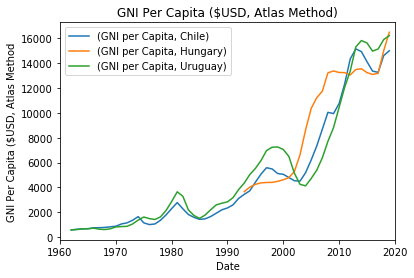

In [48]:
#set up the countries I want
#countries = ["CL","UY","HU"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}
 
#grab indicators above for countires above and load into data frame
df = wb.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='best'); 
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method');

In [ ]:
wbdata.search_indicators('gdp per capita')

Text(0, 0.5, 'GDP per capita (current US$)')

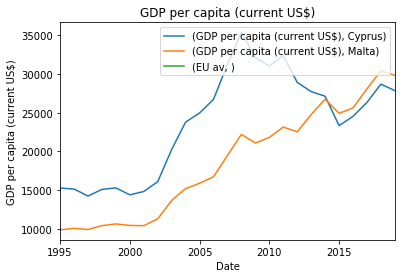

In [49]:
#set up the countries I want
countries = ["DE","FR","BG","RO","SRB", "CZ"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'NY.GDP.PCAP.CD':'GDP per capita (current US$)'}

data_date = dt.datetime(1995, 1, 1), dt.datetime(2019, 1, 1)
 
#grab indicators above for countires above and load into data frame
df = wb.get_dataframe(indicators, country=group_4, data_date=data_date, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)
list1 = []
for i in range(25) :
    list1.append(dfu.iloc[i][2:4].mean())
list1
dfu["EU av"] = list1
dfu

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='upper right')
plt.title("GDP per capita (current US$)")
plt.xlabel('Date')
plt.ylabel('GDP per capita (current US$)')

In [11]:
wbdata.search_indicators('gdp growth')

5.51.01.10.gdp      	Per capita GDP growth
6.0.GDP_growth      	GDP growth (annual %)
NV.AGR.TOTL.ZG      	Real agricultural GDP growth rates (%)
NY.GDP.MKTP.KD.ZG   	GDP growth (annual %)
NY.GDP.MKTP.KN.87.ZG	GDP growth (annual %)


In [12]:
wbdata.get_indicator('6.0.GDP_growth')

6.0.GDP_growth	GDP growth (annual %)


Text(0, 0.5, 'GDP per capita (current US$)')

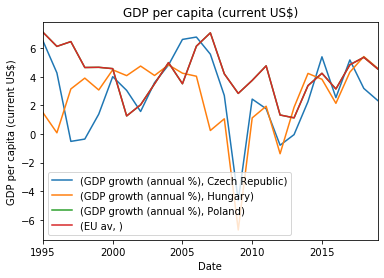

In [51]:
#set up the countries I want
countries = ["DE","FR","BG","RO","SRB", "CZ"]
 
#set up the indicator I want (just build up the dict if you want more than one)
growth = {'NY.GDP.MKTP.KD.ZG':'GDP growth (annual %)'}

data_date = datetime.datetime(1995, 1, 1), datetime.datetime(2019, 1, 1)
 
#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(growth, country=group_1, data_date=data_date, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)
list1 = []
for i in range(25) :
    list1.append(dfu.iloc[i][2:4].mean())
list1
dfu["EU av"] = list1
dfu

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='lower left')
plt.title("GDP per capita (current US$)")
plt.xlabel('Date')
plt.ylabel('GDP per capita (current US$)')

In [16]:
df1 = wbdata.get_country()

ABW	Aruba
AFG	Afghanistan
AFR	Africa
AGO	Angola
ALB	Albania
AND	Andorra
ARB	Arab World
ARE	United Arab Emirates
ARG	Argentina
ARM	Armenia
ASM	American Samoa
ATG	Antigua and Barbuda
AUS	Australia
AUT	Austria
AZE	Azerbaijan
BDI	Burundi
BEA	East Asia & Pacific (IBRD-only countries)
BEC	Europe & Central Asia (IBRD-only countries)
BEL	Belgium
BEN	Benin
BFA	Burkina Faso
BGD	Bangladesh
BGR	Bulgaria
BHI	IBRD countries classified as high income
BHR	Bahrain
BHS	Bahamas, The
BIH	Bosnia and Herzegovina
BLA	Latin America & the Caribbean (IBRD-only countries)
BLR	Belarus
BLZ	Belize
BMN	Middle East & North Africa (IBRD-only countries)
BMU	Bermuda
BOL	Bolivia
BRA	Brazil
BRB	Barbados
BRN	Brunei Darussalam
BSS	Sub-Saharan Africa (IBRD-only countries)
BTN	Bhutan
BWA	Botswana
CAA	Sub-Saharan Africa (IFC classification)
CAF	Central African Republic
CAN	Canada
CEA	East Asia and the Pacific (IFC classification)
CEB	Central Europe and the Baltics
CEU	Europe and Central Asia (IFC classification)
CHE	Switzerlan

# Sensitivity analysis (0.5 points)

If you do a theory notebook, program different values for the parameters, use different functional forms and solve your model again for these new values. Show that the outcomes are robust to such changes.

If you are using data, how sensitive are your results to outliers in the data, different choices when cleaning the data, different functional forms for the relations that you estimate.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Discussion and conclusion (0.5 points)

What did you find in the analysis above; what is the answer to the question you started out with.

What are weaknesses of your approach that can be improved upon in future research (e.g. in your thesis).


YOUR ANSWER HERE